### Step 1: Reading and Understanding the Data

In [1]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import sqlite3
conn = sqlite3.connect('research.db')


###  Fetch all accounts

In [2]:
cur = conn.cursor()
cur.execute("select \"Id\", \"RecordType.Name\",\"Industry\",\"Business_Type__c\",\"Country__c\",\"Is_External__c\",\"ParentId\"from \"Account\" union \
select \"Id\", \"RecordType.Name\",\"Education\" as \"Industry\",\"Not for profit\" as \"Business_Type__c\",\"Australia\" as \"Country__c\", \
\"Is_External__c\",\"ParentId\" from \"Account_internal\"")
accounts_all = cur.fetchall()
accounts_all= pd.DataFrame(accounts_all)
accounts_all.columns= ['AccountID', 'AccountType','Industry','BusinessType','Country','Internal_External','ParentAccount']
accounts_all.loc[accounts_all['AccountType'] == 'University Department', 'Industry'] = 'Education'  
accounts_all.loc[accounts_all['AccountType'] == 'University Department', 'BusinessType'] = 'University'  
accounts_all.loc[accounts_all['AccountType'] == 'University Department', 'Country'] = 'Australia' 
accounts_all['f_Australia']=accounts_all['Country'].apply(lambda x: 1 if x == 'Australia' else 0)
accounts_all["f_parent"]=accounts_all['ParentAccount'].notnull().astype(int)
accounts_all=accounts_all.drop(["ParentAccount"],axis=1)
accounts_all=accounts_all.drop(["Country"],axis=1)

In [3]:
cur.execute("select * from \"Opportunities\"")
Opportunity_raw = cur.fetchall()
Opportunity_raw= pd.DataFrame(Opportunity_raw)
Opportunity_raw.columns= ['ID', 'outcome','status_reason','init_OppType','Opptype','Supppoted', 
                          'createDate','est_closeDate','act_closeDate', 'est_amt','est_proj','act_amt',
                          'act_proj','bd_cluster','bd_div','aud_type','course_type','accountId',
                          'cust_contact','lead_aca_contact','lead_faculty','lead_school','lead_dep','supp_1'
                          ,'supp_2','ownerid','parent_opp'
                         ]
Opportunity_raw.loc[Opportunity_raw["status_reason"]=="Other (Lost)","outcome"] = "Closed Lost"

Opportunity_raw.loc[Opportunity_raw["lead_faculty"].isnull(),"lead_faculty"] = Opportunity_raw["supp_1"]
#Opportunity_raw.loc[Opportunity_raw["lead_faculty"].isnull(),"lead_faculty"] = "no data"

In [4]:

Opportunity_raw.loc[Opportunity_raw["lead_school"]=="0012e000002Z3pPAAS","lead_faculty"] = "0012e000002ZLg7AAG"
Opportunity_raw.loc[Opportunity_raw["lead_school"]=="0012e000002YlvyAAC","lead_faculty"] = "0012e000002ZNYOAA4"

Opportunity_raw.loc[Opportunity_raw["lead_aca_contact"]=="0032e000002cDpsAAE","lead_faculty"] = "0012e000002ZGfbAAG"
Opportunity_raw.loc[Opportunity_raw["lead_aca_contact"]=="0032e000002cFb5AAE","lead_faculty"] = "0012e000002ZNYOAA4"
Opportunity_raw.loc[Opportunity_raw["lead_aca_contact"]=="0032e000002cFEoAAM","lead_faculty"] = "0012e000002Zt1zAAC"
Opportunity_raw.loc[Opportunity_raw["lead_aca_contact"]=="0032e000002cFK4AAM","lead_faculty"] = "0012e000002Zt1RAAS"
Opportunity_raw.loc[Opportunity_raw["lead_aca_contact"]=="0032e000002cGXKAA2","lead_faculty"] = "0012e000002ZGfbAAG"
Opportunity_raw.loc[Opportunity_raw["lead_aca_contact"]=="0032e000002cLc4AAE","lead_faculty"] = "0012e000002ZGfbAAG"
Opportunity_raw.loc[Opportunity_raw["lead_aca_contact"]=="0032e000002cLTSAA2","lead_faculty"] = "0012e000002ZmnxAAC"
Opportunity_raw.loc[Opportunity_raw["lead_aca_contact"]=="0032e000002cMYMAA2","lead_faculty"] = "0012e000002ZLg7AAG"
Opportunity_raw.loc[Opportunity_raw["lead_aca_contact"]=="0032e000002emOlAAI","lead_faculty"] = "0012e000002ZNYOAA4"

Opportunity_raw.loc[(Opportunity_raw["bd_cluster"]=="RIC-BDI") & (Opportunity_raw["lead_faculty"].isnull()) ,"lead_faculty"]  = "0012e000002ZLg7AAG"
Opportunity_raw.loc[(Opportunity_raw["bd_cluster"]=="RIC-BDI-HASS") & (Opportunity_raw["bd_div"]=="MGSE") & (Opportunity_raw["lead_faculty"].isnull()) ,"lead_faculty"]  = "0012e000002Zmo0AAC"
Opportunity_raw.loc[(Opportunity_raw["bd_cluster"]=="RIC-BDI-HASS") & (Opportunity_raw["bd_div"]=="FFAM") & (Opportunity_raw["lead_faculty"].isnull()) ,"lead_faculty"]  = "0012e000002ZmOZAA0"
Opportunity_raw.loc[(Opportunity_raw["bd_cluster"]=="RIC-BDI-HASS") & (Opportunity_raw["bd_div"]=="FBE") & (Opportunity_raw["lead_faculty"].isnull()) ,"lead_faculty"]  = "0012e000002ZLgJAAW"
Opportunity_raw.loc[(Opportunity_raw["bd_cluster"]=="RIC-BDI-HASS") & (Opportunity_raw["bd_div"]=="ARTS") & (Opportunity_raw["lead_faculty"].isnull()) ,"lead_faculty"]  = "0012e000002ZNYOAA4"
Opportunity_raw.loc[(Opportunity_raw["bd_cluster"]=="RIC-BDI-MDHS") & (Opportunity_raw["lead_faculty"].isnull()) ,"lead_faculty"]  = "0012e000002ZGfbAAG"
Opportunity_raw.loc[(Opportunity_raw["bd_cluster"]=="RIC-BDI-MSPACE") & (Opportunity_raw["lead_faculty"].isnull()) ,"lead_faculty"]  = "0012e000002Zt1RAAS"
Opportunity_raw.loc[(Opportunity_raw["bd_cluster"]=="RIC-BDI-HASS") & (Opportunity_raw["bd_div"]=="FBE") & (Opportunity_raw["lead_faculty"].isnull()) ,"lead_faculty"]  = "0012e000002ZLgJAAW"
Opportunity_raw.loc[(Opportunity_raw["bd_cluster"]=="RIC-BDI-STEM") & (Opportunity_raw["bd_div"]=="ABP") & (Opportunity_raw["lead_faculty"].isnull()) ,"lead_faculty"]  = "0012e000002ZLgIAAW"
Opportunity_raw.loc[(Opportunity_raw["bd_cluster"]=="RIC-BDI-STEM") & (Opportunity_raw["bd_div"]=="FVAS") & (Opportunity_raw["lead_faculty"].isnull()) ,"lead_faculty"]  = "0012e000002ZmnzAAC"
Opportunity_raw.loc[(Opportunity_raw["bd_cluster"]=="RIC-BDI-STEM") & (Opportunity_raw["bd_div"]=="MSE") & (Opportunity_raw["lead_faculty"].isnull()) ,"lead_faculty"]  = "0012e000002ZLg7AAG"
Opportunity_raw.loc[(Opportunity_raw["bd_cluster"]=="RIC-BDI-STEM") & (Opportunity_raw["bd_div"]=="SCIENCE") & (Opportunity_raw["lead_faculty"].isnull()) ,"lead_faculty"]  = "0012e000002ZmnxAAC"

In [5]:
#Opportunity_raw.loc[Opportunity_raw["lead_faculty"].isnull(),"lead_faculty"] = "Missing Faculty"
Opportunity_raw.loc[Opportunity_raw["act_amt"].isnull(),"act_amt"] = Opportunity_raw["est_amt"] 
Opportunity_raw.loc[Opportunity_raw["act_amt"].isnull(),"act_amt"] = 0
Opportunity_raw.loc[Opportunity_raw["act_proj"].isnull(),"act_proj"] = Opportunity_raw["est_proj"]
Opportunity_raw.loc[Opportunity_raw["act_proj"].isnull(),"act_proj"] = 0
Opportunity_raw.loc[Opportunity_raw["act_closeDate"].isnull(),"act_closeDate"] = Opportunity_raw["est_closeDate"]
Opportunity_raw['createDate'] = Opportunity_raw['createDate'].str[:10]
Opportunity_raw['createDate'] = pd.to_datetime(Opportunity_raw['createDate'])
Opportunity_raw['act_closeDate'] = pd.to_datetime(Opportunity_raw['act_closeDate'])
Opportunity_raw['closeDate_month'] = Opportunity_raw['act_closeDate'].dt.month
Opportunity_raw['createDate_month'] = Opportunity_raw['createDate'].dt.month
Opportunity_raw['closeDate_year'] = Opportunity_raw['act_closeDate'].dt.year
Opportunity_raw['createDate_year'] = Opportunity_raw['createDate'].dt.year
Opportunity_raw['days_diff']=(Opportunity_raw['act_closeDate']-Opportunity_raw['createDate']).dt.days
Opportunity_raw["f_parent_opp"]=Opportunity_raw['parent_opp'].notnull().astype(int)

Opportunity_raw['RN'] = Opportunity_raw.sort_values(['createDate','act_closeDate'], ascending=[True,True]).groupby(['accountId']).cumcount() + 1
Opportunity_raw.loc[Opportunity_raw["accountId"].isnull(),"RN"] = 0
Opportunity_raw_after=Opportunity_raw[['outcome','Opptype','Supppoted', 
                          'days_diff','createDate','act_closeDate','closeDate_month','createDate_month','closeDate_year','createDate_year','act_amt',
                          'act_proj','accountId',
                          'lead_faculty','f_parent_opp','RN']]

In [6]:
Opportunity_raw_won=Opportunity_raw_after[Opportunity_raw_after.outcome=='Closed Won']
Opportunity_raw_won['RN_2'] = Opportunity_raw_won.sort_values(['createDate','act_closeDate'], ascending=[True,True]).groupby(['accountId']).cumcount() + 1
Opportunity_raw_won=Opportunity_raw_won[Opportunity_raw_won.RN==1]
Opportunity_raw_won=Opportunity_raw_won[['accountId','createDate']]
Opportunity_raw_won.columns=['accountID_match','firstwon_createdate']
Opportunity_raw_after=Opportunity_raw_after.merge(Opportunity_raw_won, left_on='accountId', right_on='accountID_match',how='left')
Opportunity_raw_after['f_won_before']=np.where((Opportunity_raw_after['createDate'] >= Opportunity_raw_after['firstwon_createdate']), 1, 0)
Opportunity_raw_after.loc[Opportunity_raw_after["accountId"].isnull(),"f_won_before"] = 0
Opportunity_raw_after

C:\Users\BingLesleyYuan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,outcome,Opptype,Supppoted,days_diff,createDate,act_closeDate,closeDate_month,createDate_month,closeDate_year,createDate_year,act_amt,act_proj,accountId,lead_faculty,f_parent_opp,RN,accountID_match,firstwon_createdate,f_won_before
0,Proposing,Custom Education (MSPACE Included),RIC-BD&I,423,2019-11-25,2021-01-21,1,11,2021,2019,594623,594623.0,0012e000003A6pIAAS,0012e000002Zmo0AAC,0,22,NaN,NaT,0
1,Closed Lost,Research Contract,RIC-BD&I,56,2018-12-17,2019-02-11,2,12,2019,2018,0,0,0012e000003A6qZAAS,None,0,112,NaN,NaT,0
2,Closed Lost,Research Contract,RIC RE&D and BD&I,77,2018-10-01,2018-12-17,12,10,2018,2018,0,0,0012e000003A6qZAAS,None,0,101,NaN,NaT,0
3,Closed Lost,Research Contract,RIC-BD&I,161,2018-12-17,2019-05-27,5,12,2019,2018,0,0,0012e000003A6qTAAS,None,0,17,0012e000003A6qTAAS,2016-06-10,1
4,Closed Lost,Research Contract,RIC RE&D and BD&I,77,2018-10-01,2018-12-17,12,10,2018,2018,0,0,0012e000003A6qZAAS,None,0,102,NaN,NaT,0
5,Closed Lost,Research Contract,RIC-BD&I,129,2019-01-18,2019-05-27,5,1,2019,2019,0,0,0012e000003A6qZAAS,None,0,115,NaN,NaT,0
6,Closed Lost,Research Contract,RIC RE&D and BD&I,53,2018-10-25,2018-12-17,12,10,2018,2018,0,0,0012e000003A6qZAAS,None,0,105,NaN,NaT,0
7,Closed Lost,Research Contract,RIC RE&D and BD&I,15,2018-12-02,2018-12-17,12,12,2018,2018,0,0,0012e000003A6qZAAS,None,0,108,NaN,NaT,0
8,Closed Lost,Custom Education (MSPACE Included),RIC RE&D and BD&I,8,2018-11-12,2018-11-20,11,11,2018,2018,0,0,0012e000003A6Q9AAK,None,0,3,NaN,NaT,0
9,Closed Lost,Research Contract,RIC RE&D and BD&I,108,2018-08-31,2018-12-17,12,8,2018,2018,0,0,0012e000003A6ugAAC,None,0,1,NaN,NaT,0


In [7]:
merged=Opportunity_raw_after.merge(accounts_all, left_on='accountId', right_on='AccountID',how='left')
merged=merged.drop(["accountId","AccountID","accountID_match","firstwon_createdate","createDate","act_closeDate"],axis=1)
merged_data=merged[(merged.outcome == 'Closed Lost')|(merged.outcome =='Closed Won')]

merged_data.loc[merged_data["AccountType"].isnull() ,"AccountType"]  = "Business Organization"

merged_data.loc[(merged_data["Industry"]=="Agriculture & Horticulture") & (merged_data["lead_faculty"].isnull()) ,"lead_faculty"]  = "0012e000002ZmnzAAC"
merged_data.loc[(merged_data["Industry"]=="Construction & Construction Materials") & (merged_data["lead_faculty"].isnull()) ,"lead_faculty"]  = "0012e000002ZLgIAAW"
merged_data.loc[(merged_data["Industry"]=="Defence") & (merged_data["lead_faculty"].isnull()) ,"lead_faculty"]  = "0012e000002ZLg7AAG"
merged_data.loc[(merged_data["Industry"]=="Education") & (merged_data["lead_faculty"].isnull()) ,"lead_faculty"]  = "0012e000002ZNYOAA4"
merged_data.loc[(merged_data["Industry"]=="Energy & Utilities") & (merged_data["lead_faculty"].isnull()) ,"lead_faculty"]  = "0012e000002ZLg7AAG"
merged_data.loc[(merged_data["Industry"]=="Health") & (merged_data["lead_faculty"].isnull()) ,"lead_faculty"]  = "0012e000002ZGfbAAG"
merged_data.loc[(merged_data["Industry"]=="Manufacturing & R&D") & (merged_data["lead_faculty"].isnull()) ,"lead_faculty"]  = "0012e000002ZLg7AAG"
merged_data.loc[(merged_data["Industry"]=="Materials: Chemicals & Industrial Metals") & (merged_data["lead_faculty"].isnull()) ,"lead_faculty"]  = "0012e000002ZmnxAAC"
merged_data.loc[(merged_data["Industry"]=="Mining & Refining") & (merged_data["lead_faculty"].isnull()) ,"lead_faculty"]  = "0012e000002ZLg7AAG"
merged_data.loc[(merged_data["Industry"]=="Mining Equipment and Technology Services") & (merged_data["lead_faculty"].isnull()) ,"lead_faculty"]  = "0012e000002ZLg7AAG"
merged_data.loc[(merged_data["Industry"]=="Services") & (merged_data["lead_faculty"].isnull()) ,"lead_faculty"]  = "0012e000002Zmo0AAC"
merged_data.loc[(merged_data["Industry"]=="Technology: IT & Telephone Services") & (merged_data["lead_faculty"].isnull()) ,"lead_faculty"]  = "0012e000002ZLg7AAG"
merged_data.loc[(merged_data["Industry"]=="Transportation & Logistics") & (merged_data["lead_faculty"].isnull()) ,"lead_faculty"]  = "0012e000002ZLg7AAG"
merged_data.loc[(merged_data["Industry"]=="Technology: IT & Telephone Services") & (merged_data["lead_faculty"].isnull()) ,"lead_faculty"]  = "0012e000002ZLg7AAG"
merged_data.loc[(merged_data["Industry"]=="Public Administration") & (merged_data["lead_faculty"].isnull()) ,"lead_faculty"]  = "0012e000002ZLg7AAG"

merged_data.loc[(merged_data["lead_faculty"]=="0012e000002Zt1RAAS") & (merged_data["Industry"].isnull()) ,"Industry"]  = "Services"
merged_data.loc[(merged_data["lead_faculty"]=="0012e000002ZNYOAA4") & (merged_data["Industry"].isnull()) ,"Industry"]  = "Services"
merged_data.loc[(merged_data["lead_faculty"]=="0012e000002ZmOZAA0") & (merged_data["Industry"].isnull()) ,"Industry"]  = "Services"
merged_data.loc[(merged_data["lead_faculty"]=="0012e000002ZmOUAA0") & (merged_data["Industry"].isnull()) ,"Industry"]  = "Technology: IT & Telephone Services"
merged_data.loc[(merged_data["lead_faculty"]=="0012e000002Zmo0AAC") & (merged_data["Industry"].isnull()) ,"Industry"]  = "Services"
merged_data.loc[(merged_data["lead_faculty"]=="0012e000002ZmnzAAC") & (merged_data["Industry"].isnull()) ,"Industry"]  = "Agriculture & Horticulture"
merged_data.loc[(merged_data["lead_faculty"]=="0012e000002ZmnxAAC") & (merged_data["Industry"].isnull()) ,"Industry"]  = "Defence"
merged_data.loc[(merged_data["lead_faculty"]=="0012e000002ZLgJAAW") & (merged_data["Industry"].isnull()) ,"Industry"]  = "Services"
merged_data.loc[(merged_data["lead_faculty"]=="0012e000002ZLgIAAW") & (merged_data["Industry"].isnull()) ,"Industry"]  = "Services"
merged_data.loc[(merged_data["lead_faculty"]=="0012e000002ZLg7AAG") & (merged_data["Industry"].isnull()) ,"Industry"]  = "Public Administration"
merged_data.loc[(merged_data["lead_faculty"]=="0012e000002ZGfbAAG") & (merged_data["Industry"].isnull()) ,"Industry"]  = "Health"
merged_data.loc[(merged_data["lead_faculty"]=="0012e000002ZFZYAA4") & (merged_data["Industry"].isnull()) ,"Industry"]  = "Services"




merged_data.loc[(merged_data["Industry"]=="Agriculture & Horticulture") & (merged_data["BusinessType"].isnull()) ,"BusinessType"]  = "SME (small to medium enterprise)"
merged_data.loc[(merged_data["Industry"]=="Defence") & (merged_data["BusinessType"].isnull()) ,"BusinessType"]  = "Government: Australia: Federal"
merged_data.loc[(merged_data["Industry"]=="Health") & (merged_data["BusinessType"].isnull()) ,"BusinessType"]  = "Government: Australia: Federal"
merged_data.loc[(merged_data["Industry"]=="Services")  & (merged_data["lead_faculty"]=="0012e000002ZLgJAAW")& (merged_data["BusinessType"].isnull()) ,"BusinessType"]  = "Large Australian Corporate"
merged_data.loc[(merged_data["Industry"]=="Services")&(merged_data["BusinessType"].isnull()) ,"BusinessType"]  = "Government: Australia: Local & State"
merged_data.loc[(merged_data["Industry"]=="Public Administration")&(merged_data["BusinessType"].isnull()) ,"BusinessType"]  = "Government: Australia: Local & State"
merged_data.loc[(merged_data["Industry"]=="Technology: IT & Telephone Services") & (merged_data["BusinessType"].isnull()) ,"BusinessType"]  = "SME (small to medium enterprise)"
merged_data.loc[(merged_data["Industry"]=="Agriculture & Horticulture") & (merged_data["BusinessType"].isnull()) ,"BusinessType"]  = "SME (small to medium enterprise)"


merged_data.loc[merged_data["f_Australia"].isnull() ,"f_Australia"]  = 1
merged_data.loc[merged_data["f_parent"].isnull() ,"f_parent"]  = 0
merged_data.loc[merged_data["Internal_External"].isnull() ,"Internal_External"]  = "External"
merged_data=merged_data.drop(["AccountType"],axis=1)
merged_data['faculty_opptype']=merged_data['Opptype'] + merged_data['lead_faculty']
merged_data['opptype_business']=merged_data['Opptype'] + merged_data['BusinessType']
#merged_data['opptype_industry']=merged_data['Opptype'] + merged_data['Industry']
#merged_data['Businesstype_industry']=merged_data['BusinessType'] + merged_data['Industry']

C:\Users\BingLesleyYuan\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [20]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import seaborn as sns

def cramers_v(x,y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [21]:
cramers_v(merged_data["outcome"], merged_data["Supppoted"])

0.18070682018722672

In [8]:
merged_data.head()

,outcome,Opptype,Supppoted,days_diff,closeDate_month,createDate_month,closeDate_year,createDate_year,act_amt,act_proj,...,f_parent_opp,RN,f_won_before,Industry,BusinessType,Internal_External,f_Australia,f_parent,faculty_opptype,opptype_business
1,Closed Lost,Research Contract,RIC-BD&I,56,2,12,2019,2018,0,0,...,0,112,0,Services,Government: Australia: Local & State,External,1.0,1.0,Research Contract0012e000002Zmo0AAC,Research ContractGovernment: Australia: Local ...
2,Closed Lost,Research Contract,RIC RE&D and BD&I,77,12,10,2018,2018,0,0,...,0,101,0,Services,Government: Australia: Local & State,External,1.0,1.0,Research Contract0012e000002Zmo0AAC,Research ContractGovernment: Australia: Local ...
3,Closed Lost,Research Contract,RIC-BD&I,161,5,12,2019,2018,0,0,...,0,17,1,Services,Government: Australia: Local & State,External,1.0,0.0,Research Contract0012e000002Zmo0AAC,Research ContractGovernment: Australia: Local ...
4,Closed Lost,Research Contract,RIC RE&D and BD&I,77,12,10,2018,2018,0,0,...,0,102,0,Services,Government: Australia: Local & State,External,1.0,1.0,Research Contract0012e000002Zmo0AAC,Research ContractGovernment: Australia: Local ...
5,Closed Lost,Research Contract,RIC-BD&I,129,5,1,2019,2019,0,0,...,0,115,0,Services,Government: Australia: Local & State,External,1.0,1.0,Research Contract0012e000002Zmo0AAC,Research ContractGovernment: Australia: Local ...


In [9]:
merged_data.to_csv('merged_data.csv',index=False)


In [12]:
print(len(merged_data))
#merged_data=merged_data[~merged_data.AccountType.isna()]
merged_data=merged_data[~merged_data.BusinessType.isna()]
print(len(merged_data))
merged_data.to_csv('merged_data_final.csv',index=False)

X = merged_data.iloc[:, 1:].values
y = merged_data.iloc[:, 0].values


6308
6308


In [13]:
from sklearn.preprocessing import LabelEncoder

labelencoder_X = LabelEncoder()
X[:,0] = labelencoder_X.fit_transform(X[:,0]) #opptype
X[:,1] = labelencoder_X.fit_transform(X[:,1]) #RIC Supppoted
X[:,9] = labelencoder_X.fit_transform(X[:,9])
X[:,13] = labelencoder_X.fit_transform(X[:,13])
X[:,14] = labelencoder_X.fit_transform(X[:,14])
X[:,15] = labelencoder_X.fit_transform(X[:,15])
X[:,16] = labelencoder_X.fit_transform(X[:,16])
X[:,18] = labelencoder_X.fit_transform(X[:,18])
X[:,19] = labelencoder_X.fit_transform(X[:,19])
#X[:,20] = labelencoder_X.fit_transform(X[:,20])
#X[:,21] = labelencoder_X.fit_transform(X[:,21])

labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)


In [86]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (5046, 20) (5046,)
Test (1262, 20) (1262,)


In [87]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.67
Accuracy of Logistic regression classifier on test set: 0.69


In [88]:
scores = cross_val_score(estimator=logreg, X=X, y=y, cv=10, n_jobs=4)
print(scores)

[0.67828843 0.69096672 0.68779715 0.67670365 0.66402536 0.67670365
 0.67828843 0.67670365 0.67777778 0.66666667]


Feature: 0, Score: -0.00000
Feature: 1, Score: -0.00000
Feature: 2, Score: -0.00003
Feature: 3, Score: -0.00000
Feature: 4, Score: -0.00000
Feature: 5, Score: -0.00018
Feature: 6, Score: -0.00018
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: -0.00000
Feature: 10, Score: -0.00000
Feature: 11, Score: -0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: -0.00000
Feature: 14, Score: -0.00000
Feature: 15, Score: -0.00000
Feature: 16, Score: -0.00000
Feature: 17, Score: -0.00000
Feature: 18, Score: -0.00000
Feature: 19, Score: -0.00000


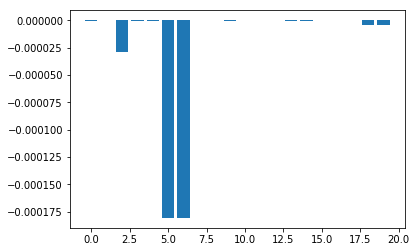

In [89]:
# get importance
importance = logreg.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [79]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.90


In [80]:
scores = cross_val_score(estimator=clf, X=X, y=y, cv=10, n_jobs=4)
print(scores)

[0.90808241 0.90649762 0.84786054 0.88114105 0.75435816 0.88748019
 0.87955626 0.90015848 0.90952381 0.84761905]


Feature: 0, Score: 0.00585
Feature: 1, Score: 0.00497
Feature: 2, Score: 0.06707
Feature: 3, Score: 0.01864
Feature: 4, Score: 0.01845
Feature: 5, Score: 0.05417
Feature: 6, Score: 0.01124
Feature: 7, Score: 0.02741
Feature: 8, Score: 0.41170
Feature: 9, Score: 0.01597
Feature: 10, Score: 0.00743
Feature: 11, Score: 0.14763
Feature: 12, Score: 0.12267
Feature: 13, Score: 0.00994
Feature: 14, Score: 0.02028
Feature: 15, Score: 0.00060
Feature: 16, Score: 0.00357
Feature: 17, Score: 0.00087
Feature: 18, Score: 0.01785
Feature: 19, Score: 0.01753
Feature: 20, Score: 0.01617


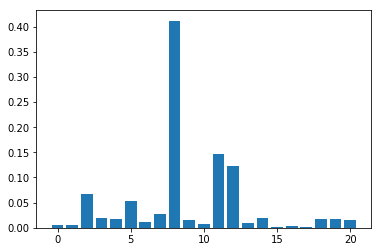

In [81]:
# get importance
importance = clf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Accuracy of Random Forest  Classifier on training set: 1.00
Accuracy of Random Forest Classifier on test set: 1.00
Feature: 0, Score: 0.00967
Feature: 1, Score: 0.01871
Feature: 2, Score: 0.08465
Feature: 3, Score: 0.02987
Feature: 4, Score: 0.02453
Feature: 5, Score: 0.03744
Feature: 6, Score: 0.02129
Feature: 7, Score: 0.15444
Feature: 8, Score: 0.22310
Feature: 9, Score: 0.02065
Feature: 10, Score: 0.00986
Feature: 11, Score: 0.09242
Feature: 12, Score: 0.12714
Feature: 13, Score: 0.01460
Feature: 14, Score: 0.01628
Feature: 15, Score: 0.00035
Feature: 16, Score: 0.00426
Feature: 17, Score: 0.00606
Feature: 18, Score: 0.02855
Feature: 19, Score: 0.02432
Feature: 20, Score: 0.02381
Feature: 21, Score: 0.02801


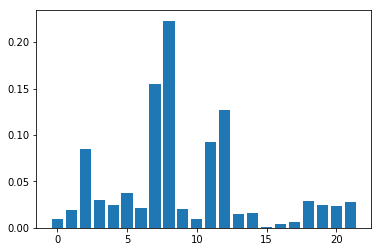

In [54]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
# fit the model
model.fit(X, y)

print('Accuracy of Random Forest  Classifier on training set: {:.2f}'
     .format(model.score(X_train, y_train)))
print('Accuracy of Random Forest Classifier on test set: {:.2f}'
     .format(model.score(X_test, y_test)))
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [55]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.89
Accuracy of K-NN classifier on test set: 0.85


In [56]:
scores = cross_val_score(estimator=knn, X=X, y=y, cv=10, n_jobs=4)
print(scores)


[0.8637084  0.84152139 0.70839937 0.83359746 0.7955626  0.85736926
 0.85103011 0.86687797 0.84126984 0.85555556]


In [57]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

Accuracy of LDA classifier on training set: 0.80
Accuracy of LDA classifier on test set: 0.79


In [58]:
scores = cross_val_score(estimator=lda, X=X, y=y, cv=10, n_jobs=4)
print(scores)


[0.77654517 0.79239303 0.86846276 0.8637084  0.79239303 0.78129952
 0.73692552 0.79873217 0.75714286 0.76825397]


In [59]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.69
Accuracy of GNB classifier on test set: 0.70


In [60]:
scores = cross_val_score(estimator=gnb, X=X, y=y, cv=10, n_jobs=4)
print(scores)

[0.58320127 0.67828843 0.5340729  0.47860539 0.66085578 0.72107765
 0.47068146 0.56101426 0.49047619 0.52539683]


In [61]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.67
Accuracy of SVM classifier on test set: 0.69


In [62]:
scores = cross_val_score(estimator=svm, X=X, y=y, cv=10, n_jobs=4)
print(scores)


[0.67828843 0.659271   0.6022187  0.68621236 0.6703645  0.66402536
 0.67511886 0.67987322 0.67777778 0.68253968]


[0.93026941 0.92551506 0.84944532 0.91283677 0.78763867 0.89540412
 0.90649762 0.93660856 0.93968254 0.9031746 ]
Feature: 0, Score: 0.02900
Feature: 1, Score: 0.02276
Feature: 2, Score: 0.03829
Feature: 3, Score: 0.01424
Feature: 4, Score: 0.00612
Feature: 5, Score: 0.08796
Feature: 6, Score: 0.01114
Feature: 7, Score: 0.01467
Feature: 8, Score: 0.35829
Feature: 9, Score: 0.01135
Feature: 10, Score: 0.02675
Feature: 11, Score: 0.08824
Feature: 12, Score: 0.16475
Feature: 13, Score: 0.01255
Feature: 14, Score: 0.03085
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00658
Feature: 17, Score: 0.00689
Feature: 18, Score: 0.01634
Feature: 19, Score: 0.01695
Feature: 20, Score: 0.02299
Feature: 21, Score: 0.01329


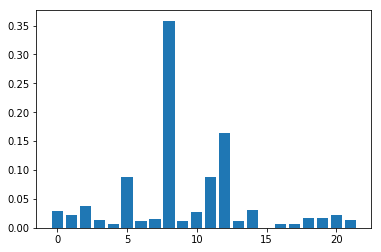

In [63]:
# xgboost for feature importance on a classification problem
from xgboost import XGBClassifier
from matplotlib import pyplot
# define dataset
# define the model
model = XGBClassifier()
# fit the model
model.fit(X, y)
scores = cross_val_score(estimator=model, X=X, y=y, cv=10, n_jobs=4)
print(scores)

# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()


[0.8637084  0.84152139 0.70839937 0.83359746 0.7955626  0.85736926
 0.85103011 0.86687797 0.84126984 0.85555556]
Feature: 0, Score: 0.00013
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.04134
Feature: 3, Score: 0.00035
Feature: 4, Score: 0.00016
Feature: 5, Score: 0.00003
Feature: 6, Score: 0.00010
Feature: 7, Score: 0.14870
Feature: 8, Score: 0.26053
Feature: 9, Score: -0.00010
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00561
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00038
Feature: 14, Score: -0.00038
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.01392
Feature: 19, Score: 0.00361
Feature: 20, Score: 0.01417
Feature: 21, Score: 0.00831


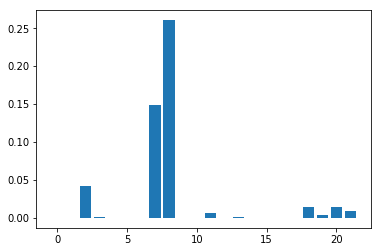

In [64]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
from matplotlib import pyplot
# define dataset

# define the model
model = KNeighborsClassifier()
# fit the model
model.fit(X, y)

scores = cross_val_score(estimator=model, X=X, y=y, cv=10, n_jobs=4)
print(scores)

# perform permutation importance
results = permutation_importance(model, X, y, scoring='accuracy')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()